## modeling with AutoML

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'

In [2]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [3]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [4]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

C:\Users\user\AppData\Local\Temp\ipykernel_13132\2365867269.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)


In [5]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [6]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

C:\Users\user\AppData\Local\Temp\ipykernel_13132\108906182.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()


In [7]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [8]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [9]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [10]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [11]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [12]:
eda_weather

,위도,경도,일시,기온,풍속,풍향,습도,강수량,hour,month,year
209952,37.4777,126.6249,2021-01-01 00:00:00,-7.5,2.0,20.0,62.0,0.0,0,1,2021
209953,37.4777,126.6249,2021-01-01 01:00:00,-7.8,1.9,50.0,63.0,0.0,1,1,2021
209954,37.4777,126.6249,2021-01-01 02:00:00,-7.8,1.0,20.0,61.0,0.0,2,1,2021
209955,37.4777,126.6249,2021-01-01 03:00:00,-8.0,1.9,50.0,60.0,0.0,3,1,2021
209956,37.4777,126.6249,2021-01-01 04:00:00,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
227443,37.4777,126.6249,2022-12-30 20:00:00,-2.6,3.0,320.0,63.0,0.0,20,12,2022
227444,37.4777,126.6249,2022-12-30 21:00:00,-2.9,3.0,320.0,66.0,0.0,21,12,2022
227445,37.4777,126.6249,2022-12-30 22:00:00,-3.4,2.1,360.0,67.0,0.0,22,12,2022
227446,37.4777,126.6249,2022-12-30 23:00:00,-3.6,2.2,320.0,67.0,0.0,23,12,2022


In [13]:
eda_weather.set_index('일시', inplace=True)

In [14]:
eda_weather

,위도,경도,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,,,
2021-01-01 00:00:00,37.4777,126.6249,-7.5,2.0,20.0,62.0,0.0,0,1,2021
2021-01-01 01:00:00,37.4777,126.6249,-7.8,1.9,50.0,63.0,0.0,1,1,2021
2021-01-01 02:00:00,37.4777,126.6249,-7.8,1.0,20.0,61.0,0.0,2,1,2021
2021-01-01 03:00:00,37.4777,126.6249,-8.0,1.9,50.0,60.0,0.0,3,1,2021
2021-01-01 04:00:00,37.4777,126.6249,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,37.4777,126.6249,-2.6,3.0,320.0,63.0,0.0,20,12,2022
2022-12-30 21:00:00,37.4777,126.6249,-2.9,3.0,320.0,66.0,0.0,21,12,2022
2022-12-30 22:00:00,37.4777,126.6249,-3.4,2.1,360.0,67.0,0.0,22,12,2022


In [15]:
solar_eda.set_index('date', inplace=True)

In [16]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [17]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [18]:
solar_2.date = pd.to_datetime(solar_2.date)

In [19]:
solar_2.set_index('date', inplace=True)

In [20]:
y = solar_2.loc[total_time].value

In [21]:
eda_weather.drop(['위도', '경도'], axis=1, inplace=True)

In [22]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [23]:
comm = y.index.intersection(x.index)

In [24]:
comm_2 = x.index.intersection(y.index)

In [25]:
x = x.loc[comm]

In [26]:
y = y.loc[comm]

In [27]:
x = x.loc[comm_2]
y = y.loc[comm_2]

In [28]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [29]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
sc = StandardScaler()

In [32]:
mn = MinMaxScaler()

In [33]:
slice = 8760

In [34]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [35]:
mn.fit(x_train)

MinMaxScaler()

In [36]:
sc_x_train = mn.transform(x_train)
sc_x_test = mn.transform(x_test)

In [37]:
mn.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [38]:
sc_y_train = mn.transform(y_train.values.reshape(-1,1)).reshape(-1)
sc_y_test = mn.transform(y_test.values.reshape(-1,1))

In [39]:
print(len(sc_x_train), len(sc_x_test), len(sc_y_train), len(sc_y_test))

8760 2783 8760 2783


In [40]:
from pycaret.regression import *

In [41]:
reg = setup(data = sc_x_train, 
            target = sc_y_train,
            fold=5)

,Description,Value
0,Session id,4940
1,Target,target
2,Target type,Regression
3,Original data shape,"(8760, 9)"
4,Transformed data shape,"(8760, 9)"
5,Transformed train set shape,"(6132, 9)"
6,Transformed test set shape,"(2628, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [42]:
best_model = compare_models(sort='RMSE', n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0601,0.0124,0.1111,0.8328,0.0812,2.8315,0.8760
rf,Random Forest Regressor,0.0575,0.0127,0.1124,0.8291,0.0822,1.7277,0.9960
et,Extra Trees Regressor,0.0599,0.0138,0.1175,0.8134,0.0858,1.9101,0.9340
gbr,Gradient Boosting Regressor,0.0756,0.0154,0.1239,0.7925,0.0914,4.1263,0.9500
knn,K Neighbors Regressor,0.0709,0.0167,0.1291,0.7741,0.0951,4.3329,0.8680
ada,AdaBoost Regressor,0.0841,0.0202,0.1419,0.7278,0.1017,3.4645,0.8740
dt,Decision Tree Regressor,0.0728,0.0250,0.1578,0.6631,0.1148,1.7905,0.8600
lar,Least Angle Regression,0.1909,0.0599,0.2448,0.1898,0.1855,18.7430,0.8580
br,Bayesian Ridge,0.1909,0.0599,0.2448,0.1898,0.1855,18.7533,0.8680
ridge,Ridge Regression,0.1909,0.0599,0.2448,0.1898,0.1855,18.7530,0.8960


In [43]:
model_results = pull()

In [44]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0601,0.0124,0.1111,0.8328,0.0812,2.8315,0.876
rf,Random Forest Regressor,0.0575,0.0127,0.1124,0.8291,0.0822,1.7277,0.996
et,Extra Trees Regressor,0.0599,0.0138,0.1175,0.8134,0.0858,1.9101,0.934
gbr,Gradient Boosting Regressor,0.0756,0.0154,0.1239,0.7925,0.0914,4.1263,0.950
knn,K Neighbors Regressor,0.0709,0.0167,0.1291,0.7741,0.0951,4.3329,0.868
ada,AdaBoost Regressor,0.0841,0.0202,0.1419,0.7278,0.1017,3.4645,0.874
dt,Decision Tree Regressor,0.0728,0.0250,0.1578,0.6631,0.1148,1.7905,0.860
lar,Least Angle Regression,0.1909,0.0599,0.2448,0.1898,0.1855,18.7430,0.858
br,Bayesian Ridge,0.1909,0.0599,0.2448,0.1898,0.1855,18.7533,0.868
ridge,Ridge Regression,0.1909,0.0599,0.2448,0.1898,0.1855,18.7530,0.896


In [45]:
best_model

[LGBMRegressor(random_state=4940),
 RandomForestRegressor(n_jobs=-1, random_state=4940),
 ExtraTreesRegressor(n_jobs=-1, random_state=4940),
 GradientBoostingRegressor(random_state=4940),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(random_state=4940),
 DecisionTreeRegressor(random_state=4940),
 Lars(random_state=4940),
 BayesianRidge(),
 Ridge(random_state=4940)]

In [46]:
lgbr = create_model('lightgbm')
rf = create_model('rf')
extra = create_model('et')
gradient = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0600,0.0125,0.1118,0.8244,0.0810,2.4056
1,0.0561,0.0104,0.1018,0.8548,0.0742,3.0686
2,0.0622,0.0133,0.1153,0.8212,0.0841,2.1738
3,0.0603,0.0129,0.1135,0.8277,0.0839,2.4361
4,0.0617,0.0128,0.1133,0.8361,0.0830,4.0736
Mean,0.0601,0.0124,0.1111,0.8328,0.0812,2.8315
Std,0.0021,0.0010,0.0048,0.0121,0.0037,0.6884


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0562,0.0126,0.1123,0.8229,0.0815,1.7094
1,0.0537,0.0110,0.1047,0.8465,0.0764,1.8046
2,0.0584,0.0127,0.1128,0.8289,0.0827,1.5341
3,0.0573,0.0132,0.1147,0.8242,0.0847,1.4739
4,0.0619,0.0138,0.1177,0.8232,0.0858,2.1167
Mean,0.0575,0.0127,0.1124,0.8291,0.0822,1.7277
Std,0.0027,0.0010,0.0043,0.0090,0.0033,0.2278


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0578,0.0134,0.1157,0.8120,0.0839,1.5965
1,0.0566,0.0128,0.1132,0.8204,0.0827,1.9451
2,0.0599,0.0132,0.1149,0.8226,0.0842,1.5567
3,0.0608,0.0146,0.1207,0.8054,0.0889,1.6143
4,0.0641,0.0151,0.1230,0.8068,0.0895,2.8381
Mean,0.0599,0.0138,0.1175,0.8134,0.0858,1.9101
Std,0.0026,0.0009,0.0037,0.0070,0.0028,0.4844


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0738,0.0153,0.1236,0.7853,0.0904,3.1101
1,0.0730,0.0139,0.1179,0.8054,0.0867,4.3106
2,0.0769,0.0153,0.1238,0.7940,0.0916,2.7122
3,0.0755,0.0161,0.1270,0.7845,0.0942,3.4147
4,0.0789,0.0162,0.1272,0.7933,0.0939,7.0836
Mean,0.0756,0.0154,0.1239,0.7925,0.0914,4.1263
Std,0.0021,0.0008,0.0034,0.0075,0.0027,1.5696


In [47]:
lgbr_best = tune_model(lgbr)
rf_best = tune_model(rf)
extra_best = tune_model(extra)
gradient_best = tune_model(gradient)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0868,0.0181,0.1344,0.7460,0.0974,5.2167
1,0.0858,0.0172,0.1313,0.7585,0.0953,4.7613
2,0.0871,0.0181,0.1345,0.7565,0.0983,3.3667
3,0.0852,0.0181,0.1347,0.7576,0.0985,4.3603
4,0.0919,0.0200,0.1413,0.7449,0.1025,7.4855
Mean,0.0874,0.0183,0.1353,0.7527,0.0984,5.0381
Std,0.0024,0.0009,0.0033,0.0060,0.0023,1.3676


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1164,0.0458,0.2140,0.3564,0.1520,2.4836
1,0.1109,0.0422,0.2053,0.4094,0.1452,3.1510
2,0.1219,0.0479,0.2189,0.3557,0.1552,1.9490
3,0.1198,0.0479,0.2189,0.3595,0.1545,2.7905
4,0.1355,0.0574,0.2396,0.2667,0.1706,4.1734
Mean,0.1209,0.0482,0.2193,0.3495,0.1555,2.9095
Std,0.0082,0.0050,0.0113,0.0461,0.0083,0.7448


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1999,0.0601,0.2452,0.1549,0.1856,18.8934
1,0.2027,0.0606,0.2461,0.1514,0.1869,18.9395
2,0.2046,0.0628,0.2507,0.1549,0.1888,11.9992
3,0.2032,0.0626,0.2502,0.1629,0.1884,14.6680
4,0.2082,0.0666,0.2581,0.1493,0.1926,19.5128
Mean,0.2037,0.0626,0.2501,0.1547,0.1885,16.8026
Std,0.0027,0.0023,0.0046,0.0046,0.0024,2.9635


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0667,0.0131,0.1142,0.8166,0.0834,2.5891
1,0.0649,0.0117,0.1082,0.8361,0.0793,4.2227
2,0.0699,0.0139,0.1178,0.8132,0.0867,2.2832
3,0.0688,0.0135,0.1160,0.8200,0.0864,2.7270
4,0.0703,0.0140,0.1183,0.8212,0.0868,4.4784
Mean,0.0681,0.0132,0.1149,0.8214,0.0845,3.2601
Std,0.0021,0.0008,0.0037,0.0078,0.0029,0.9055


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [48]:
model_list = [lgbr_best, rf_best, extra_best, gradient_best]

In [49]:
blended = blend_models(estimator_list = model_list,
                       fold = 5,
                       optimize='MSE',
                       )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0583,0.0121,0.1099,0.8303,0.0798,1.3380
1,0.0558,0.0107,0.1035,0.8501,0.0754,2.6215
2,0.0608,0.0126,0.1122,0.8307,0.0822,1.6937
3,0.0599,0.0127,0.1128,0.8298,0.0835,1.9781
4,0.0625,0.0132,0.1147,0.8319,0.0837,2.9825
Mean,0.0595,0.0123,0.1106,0.8346,0.0809,2.1228
Std,0.0023,0.0008,0.0039,0.0078,0.0031,0.6015


In [50]:
final_model = finalize_model(blended)

In [66]:
import pickle

pickle.dump(final_model, open('./finalize_model.pkl', 'wb'))

In [51]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4',
                                             'feature_5', 'feature_6',
                                             'feature_7', 'feature_8'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='m...
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=4940)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=4940)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.2,
                                                                        max_depth=6,
                                                                        max_features='log2',
                                                                        min_impurity_decrease=0.005,
                                                                        min_samples_leaf=5,
                                                                        min_samples_split=5,
                                                                        n_estimators=110,
                                                                        random_state=4940,
                                                                        subsample=0.75))],
                                 n_jobs=-1))])

In [52]:
predict_model(final_model)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
3341,0.673786,0.233871,0.138889,0.666667,0.0,0.217391,0.363636,0.0,0.000000,-0.004679
780,0.236893,0.411290,0.944444,0.241379,0.0,0.521739,0.090909,0.0,0.947279,0.931586
7432,0.712621,0.209677,0.055556,0.321839,0.0,0.695652,0.909091,0.0,0.394794,0.367472
8608,0.151456,0.395161,0.805556,0.321839,0.0,0.695652,1.000000,0.0,0.503442,0.458443
3841,0.766990,0.217742,0.638889,0.643678,0.0,0.043478,0.454545,0.0,0.000000,0.005250
...,...,...,...,...,...,...,...,...,...,...
5135,0.833010,0.129032,0.944444,0.839080,0.0,1.000000,0.636364,0.0,0.000000,-0.002773
2843,0.638835,0.419355,0.250000,0.298851,0.0,0.478261,0.272727,0.0,0.714043,0.646835
5497,0.765049,0.185484,0.138889,0.873563,0.0,0.043478,0.636364,0.0,0.000000,0.000363
8713,0.285437,0.290323,0.888889,0.597701,0.0,0.043478,1.000000,0.0,0.000000,-0.003755


In [53]:
pd.DataFrame(sc_x_test)

,0,1,2,3,4,5,6,7
0,0.182524,0.072581,0.944444,0.379310,0.0,0.043478,0.000000,1.0
1,0.182524,0.024194,0.000000,0.413793,0.0,0.086957,0.000000,1.0
2,0.190291,0.120968,0.944444,0.402299,0.0,0.130435,0.000000,1.0
3,0.190291,0.153226,0.888889,0.402299,0.0,0.173913,0.000000,1.0
4,0.192233,0.145161,0.055556,0.413793,0.0,0.217391,0.000000,1.0
...,...,...,...,...,...,...,...,...
2778,0.559223,0.250000,0.694444,0.781609,0.0,0.826087,0.272727,1.0
2779,0.549515,0.274194,0.750000,0.804598,0.0,0.869565,0.272727,1.0
2780,0.547573,0.193548,0.750000,0.850575,0.0,0.913043,0.272727,1.0
2781,0.547573,0.217742,0.750000,0.850575,0.0,0.956522,0.272727,1.0


In [54]:
final_result = predict_model(final_model, data=pd.DataFrame(sc_x_test, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']))

In [55]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [56]:
final_result.prediction_label

0      -0.009943
1      -0.001212
2      -0.006374
3      -0.007202
4      -0.003481
          ...   
2778    0.023143
2779    0.007803
2780   -0.000258
2781    0.004046
2782    0.003682
Name: prediction_label, Length: 2783, dtype: float64

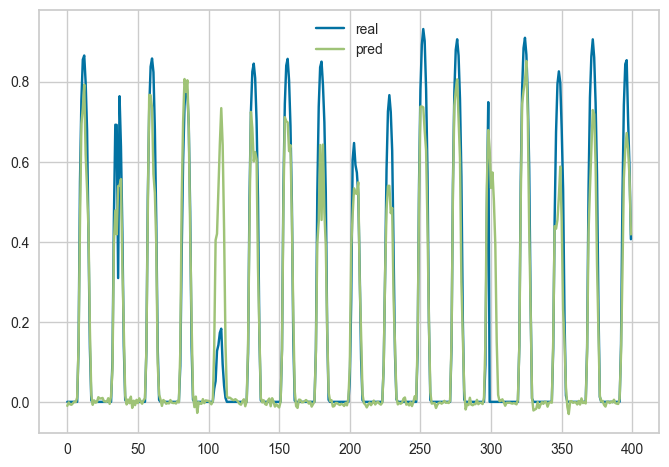

In [57]:
plt.plot(sc_y_test[:400], label='real')
plt.plot(final_result.prediction_label[:400], label='pred')
plt.legend()
plt.show()

In [58]:
inver = mn.inverse_transform(final_result.prediction_label.values.reshape(-1,1))

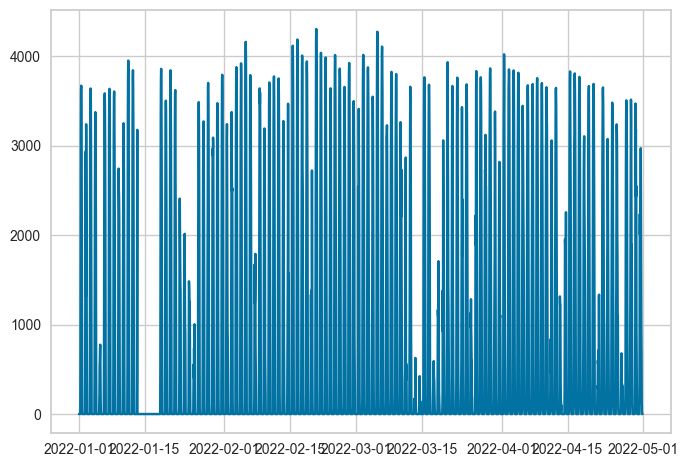

In [59]:
plt.plot(y_test)

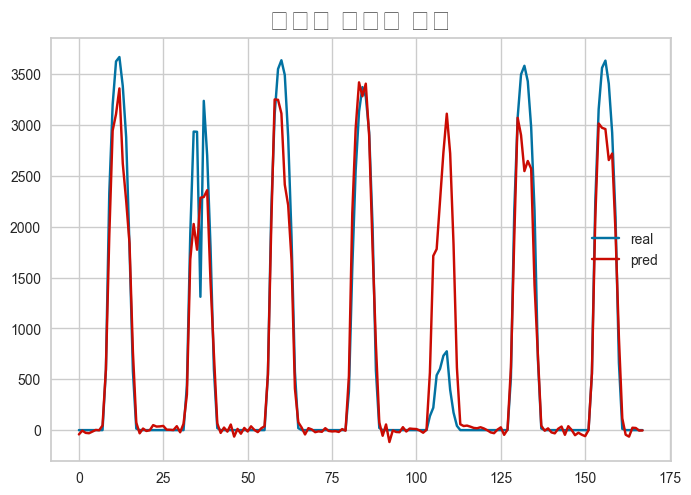

In [60]:
plt.plot(range(168), y_test[:168], label='real', color = 'b')
plt.plot(inver[:168], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

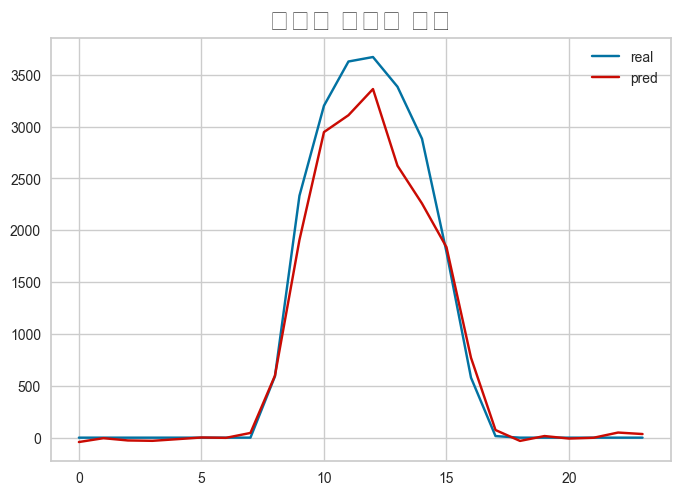

In [61]:
plt.plot(range(24), y_test[:24], label='real', color = 'b')
plt.plot(inver[:24], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

In [62]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0579,0.0119,0.1093,0.8413,0.0801,2.1416


In [63]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
6,0.194175,0.080645,0.444444,0.563218,0.0,0.260870,0.0,0.0,0.000000,-0.004932
10,0.260194,0.193548,0.444444,0.482759,0.0,0.434783,0.0,0.0,0.543903,0.414720
17,0.332039,0.080645,0.638889,0.689655,0.0,0.739130,0.0,0.0,0.065359,0.156376
19,0.326214,0.137097,0.888889,0.666667,0.0,0.826087,0.0,0.0,0.000000,-0.005113
25,0.258252,0.250000,0.055556,0.425287,0.0,0.043478,0.0,0.0,0.000000,-0.019384
...,...,...,...,...,...,...,...,...,...,...
8740,0.211650,0.516129,0.888889,0.333333,0.0,0.173913,1.0,0.0,0.000000,0.000613
8747,0.213592,0.379032,0.888889,0.264368,0.0,0.478261,1.0,0.0,0.759502,0.711265
8748,0.229126,0.282258,0.805556,0.264368,0.0,0.521739,1.0,0.0,0.877299,0.910291
8751,0.246602,0.338710,0.805556,0.229885,0.0,0.652174,1.0,0.0,0.741111,0.731145


lig_result[['target','prediction_label']].iloc[250:300,:].plot()